## About this project
You are tasked to develop a Machine Learning model that predicts 
performance degradation and potential failures in solar panels using 
historical and real-time sensor data, enabling predictive maintenance 
and optimal energy output.

## steps involved
    1. Data cleaning and EDA
    2. Feature Engineering
    3. Models selection
    4. Fit the models to the datas and make Predictions
    5. Evaluate the models
    6. Improve through experimentation
    7. save and reload our save data


## Data cleaning and EDA

 what we will be working on
    1. Droping irrelevant data
    2. Filling missing values
    3. EDA
        1. Grouping datas together
        2.

In [1]:
# import all modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test_data = pd.read_csv("dataset/test.csv")
train_data = pd.read_csv("dataset/train.csv")

In [4]:
test_data.head()

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type
0,0,17.618379,85.449838,90.81542277591531,13.910963,6.0,0.889765,6.370396,0.069101,19.517274,33.509889,7.1819582155525445,1034.782455188643,C3,E01,tracking
1,1,34.826323,722.801748,20.98299301574633,20.916528,4.0,0.590372,30.095867,1.713852,37.421443,32.327060,4.184581989921003,992.3197520437311,D4,E00,NaN
2,2,33.776934,485.491998,55.61404977577451,1.446962,3.0,0.611425,28.424430,1.696936,32.147763,69.613333,6.25944104775485,999.2134568588949,D4,E01,dual-axis
3,3,18.584189,350.022720,49.04476645510075,18.810133,5.0,NaN,7.848038,0.787188,25.734118,42.862760,2.7696074663593944,1026.6500782154521,C3,E02,dual-axis
4,4,43.044908,437.295622,8.761571340027164,NaN,8.0,0.564938,12.300717,1.867620,NaN,51.025763,11.846974043208318,1010.809942771749,B2,NaN,fixed


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  12000 non-null  int64  
 1   temperature         11418 non-null  float64
 2   irradiance          11385 non-null  float64
 3   humidity            12000 non-null  object 
 4   panel_age           11393 non-null  float64
 5   maintenance_count   11391 non-null  float64
 6   soiling_ratio       11390 non-null  float64
 7   voltage             11453 non-null  float64
 8   current             11413 non-null  float64
 9   module_temperature  11420 non-null  float64
 10  cloud_coverage      11418 non-null  float64
 11  wind_speed          12000 non-null  object 
 12  pressure            12000 non-null  object 
 13  string_id           12000 non-null  object 
 14  error_code          8389 non-null   object 
 15  installation_type   9021 non-null   object 
dtypes: f

In [7]:
test_data.columns

Index(['id', 'temperature', 'irradiance', 'humidity', 'panel_age',
       'maintenance_count', 'soiling_ratio', 'voltage', 'current',
       'module_temperature', 'cloud_coverage', 'wind_speed', 'pressure',
       'string_id', 'error_code', 'installation_type'],
      dtype='object')

In [8]:
#finding missing values
test_data.isnull().sum()

id                    0
temperature           0
irradiance            0
humidity              0
panel_age             0
maintenance_count     0
soiling_ratio         0
voltage               0
current               0
module_temperature    0
cloud_coverage        0
wind_speed            0
pressure              0
string_id             0
error_code            0
installation_type     0
dtype: int64

In [9]:
test_data["panel_age"].value_counts

<bound method IndexOpsMixin.value_counts of 0        13.910963
1        20.916528
2         1.446962
3        18.810133
4        17.473594
           ...    
11995     4.508170
11996     4.021203
11997    15.253932
11998    16.437613
11999     2.150407
Name: panel_age, Length: 12000, dtype: float64>

In [10]:
test_data["panel_age"].median()

17.47359362215461

In [11]:
test_data["panel_age"].mean()

17.47359362215461

In [12]:
#After checking both the meadian and mean of the columns, we. can use .mean() and missing for str for the missing value
test_data["panel_age"].fillna(test_data["panel_age"].mean(), inplace = True)
test_data["temperature"].fillna(test_data["temperature"].mean(), inplace = True)
test_data["irradiance"].fillna(test_data["irradiance"].mean(), inplace = True)
test_data["voltage"].fillna(test_data["voltage"].mean(), inplace = True)
test_data["current"].fillna(test_data["current"].mean(), inplace = True)
test_data["error_code"].fillna("missing", inplace = True)
test_data["maintenance_count"].fillna(test_data["maintenance_count"].mean(), inplace = True)
test_data["module_temperature"].fillna(test_data["module_temperature"].mean(), inplace = True)
test_data["cloud_coverage"].fillna(test_data["cloud_coverage"].mean(), inplace = True)
test_data["installation_type"].fillna("missing", inplace = True)
test_data["soiling_ratio"].fillna(test_data["soiling_ratio"].mean(), inplace = True)

/var/folders/lp/rls75y_x7v56hrjgpht1t4ym0000gn/T/ipykernel_2526/2983419242.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["temperature"].fillna(test_data["temperature"].mean(), inplace = True)
/var/folders/lp/rls75y_x7v56hrjgpht1t4ym0000gn/T/ipykernel_2526/2983419242.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [13]:
test_data.isnull().sum()

id                    0
temperature           0
irradiance            0
humidity              0
panel_age             0
maintenance_count     0
soiling_ratio         0
voltage               0
current               0
module_temperature    0
cloud_coverage        0
wind_speed            0
pressure              0
string_id             0
error_code            0
installation_type     0
dtype: int64

In [14]:
test_data.head()

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type
0,0,17.618379,85.449838,90.81542277591531,13.910963,6.0,0.889765,6.370396,0.069101,19.517274,33.509889,7.1819582155525445,1034.782455188643,C3,E01,tracking
1,1,34.826323,722.801748,20.98299301574633,20.916528,4.0,0.590372,30.095867,1.713852,37.421443,32.327060,4.184581989921003,992.3197520437311,D4,E00,missing
2,2,33.776934,485.491998,55.61404977577451,1.446962,3.0,0.611425,28.424430,1.696936,32.147763,69.613333,6.25944104775485,999.2134568588949,D4,E01,dual-axis
3,3,18.584189,350.022720,49.04476645510075,18.810133,5.0,0.700468,7.848038,0.787188,25.734118,42.862760,2.7696074663593944,1026.6500782154521,C3,E02,dual-axis
4,4,43.044908,437.295622,8.761571340027164,17.473594,8.0,0.564938,12.300717,1.867620,30.038138,51.025763,11.846974043208318,1010.809942771749,B2,missing,fixed


In [15]:
test_data.describe()

,id,temperature,irradiance,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,25.146375,503.680996,17.473594,3.991836,0.700468,16.520001,1.708212,30.038138,51.324166
std,3464.24595,11.976758,244.374216,9.836538,1.943923,0.168014,17.978156,1.119189,11.917950,44.600545
min,0.00000,0.000000,-564.252322,0.013553,0.000000,0.400042,0.000000,0.000065,0.000000,0.001065
25%,2999.75000,17.229078,344.612341,9.181074,3.000000,0.560995,0.000000,0.809862,21.998419,26.319099
50%,5999.50000,25.146375,503.680996,17.473594,4.000000,0.700468,14.026984,1.648770,30.038138,51.324166
75%,8999.25000,32.702795,660.103002,25.738570,5.000000,0.842465,26.194708,2.399879,37.844073,73.875998
max,11999.00000,145.879677,1420.627376,34.989441,13.000000,0.999976,417.682763,7.256391,65.000000,1000.000000


## let move to Exploratory Data Analysis(EDA)
1. let group some data and run some analysis on them
2. plot some graph
3. our observations
4. our conclusions

In [16]:
perform = test_data.groupby(["panel_age", "maintenance_count", "voltage", "current"]).size().reset_index().rename(columns={0: "Rating Count"})
perform[:15]

,panel_age,maintenance_count,voltage,current,Rating Count
0,0.013553,4.0,18.529087,0.812254,1
1,0.015410,3.0,0.000000,1.547711,1
2,0.019193,5.0,20.455124,4.212292,1
3,0.020259,2.0,0.000000,0.164478,1
4,0.028908,3.0,31.871992,1.031274,1
5,0.034943,3.0,3.373930,0.850059,1
6,0.042833,6.0,30.151065,2.182582,1
7,0.043664,3.0,18.712019,2.319603,1
8,0.048932,4.0,48.613846,1.941248,1
9,0.059431,5.0,28.019594,3.220899,1


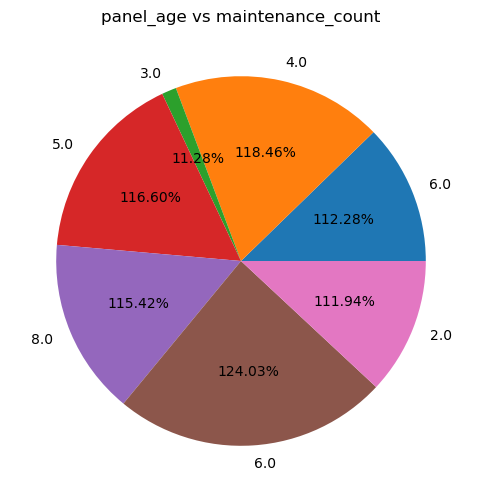

In [17]:
plt.rcParams["figure.figsize"] = (6, 6)
plt.pie(test_data["panel_age"][:7], labels= test_data["maintenance_count"][:7], autopct = "1%.2f%%")
plt.title("panel_age vs maintenance_count")
plt.show()

## Observations
1. the olds panels are with 24% maintenance which might be caused by old age.
2.  the 8 times maintenance_count which is too often 

## Conclusion
1. the 8

Text(0.5, 1.0, 'maintanance_count vs current')

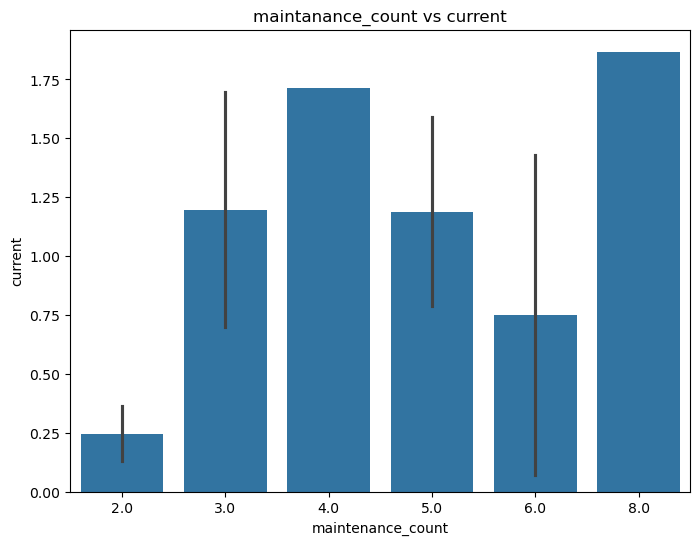

In [18]:
plt.rcParams["figure.figsize"] = (8, 6)
sns.barplot(x = test_data["maintenance_count"][:10], y = test_data["current"][:10], data = perform)
plt.title("maintanance_count vs current")

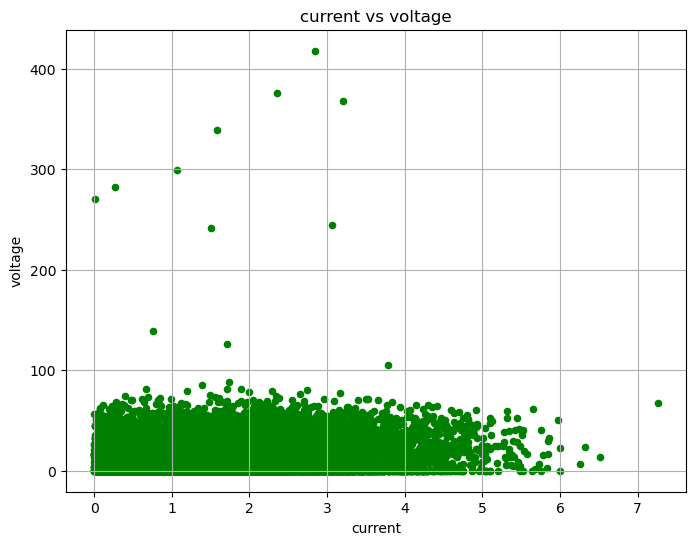

In [19]:
test_data.plot(x='current', y='voltage', kind='scatter', color='green')
plt.title("current vs voltage")
plt.ylabel("voltage")
plt.grid(True)
plt.show()

In [20]:
train_data.head()

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.82491203459621,1018.8665053152533,A1,NaN,NaN,0.562096
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012043660984917,1025.6238537572883,D4,E00,dual-axis,0.396447
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,NaN,1.814399755560454,1010.9226539809573,C3,E00,NaN,0.573776
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736258932034128,1021.8466633134253,A1,NaN,dual-axis,0.629009
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.52268384077164,1008.5559577591927,B2,E00,fixed,0.341874


In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         18999 non-null  float64
 2   irradiance          19013 non-null  float64
 3   humidity            20000 non-null  object 
 4   panel_age           18989 non-null  float64
 5   maintenance_count   18973 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          20000 non-null  object 
 12  pressure            20000 non-null  object 
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   14972 non-null  object 
 16  effi

In [22]:
train_data.isnull().sum()

id                       0
temperature           1001
irradiance             987
humidity                 0
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
wind_speed               0
pressure                 0
string_id                0
error_code            5912
installation_type     5028
efficiency               0
dtype: int64

In [25]:
train_data["panel_age"].fillna(test_data["panel_age"].mean(), inplace = True)
train_data["temperature"].fillna(test_data["temperature"].mean(), inplace = True)
train_data["irradiance"].fillna(test_data["irradiance"].mean(), inplace = True)
train_data["voltage"].fillna(test_data["voltage"].mean(), inplace = True)
train_data["current"].fillna(test_data["current"].mean(), inplace = True)
train_data["error_code"].fillna("missing", inplace = True)
train_data["maintenance_count"].fillna(test_data["maintenance_count"].mean(), inplace = True)
train_data["module_temperature"].fillna(test_data["module_temperature"].mean(), inplace = True)
train_data["cloud_coverage"].fillna(test_data["cloud_coverage"].mean(), inplace = True)
train_data["installation_type"].fillna("missing", inplace = True)
train_data["soiling_ratio"].fillna(test_data["soiling_ratio"].mean(), inplace = True)

/var/folders/lp/rls75y_x7v56hrjgpht1t4ym0000gn/T/ipykernel_2526/3518179779.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["panel_age"].fillna(test_data["panel_age"].mean(), inplace = True)
/var/folders/lp/rls75y_x7v56hrjgpht1t4ym0000gn/T/ipykernel_2526/3518179779.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

In [26]:
train_data.isnull().sum()

id                    0
temperature           0
irradiance            0
humidity              0
panel_age             0
maintenance_count     0
soiling_ratio         0
voltage               0
current               0
module_temperature    0
cloud_coverage        0
wind_speed            0
pressure              0
string_id             0
error_code            0
installation_type     0
efficiency            0
dtype: int64

In [34]:
test_train = pd.merge(test_data, train_data, on = 'id', how = "inner")

In [35]:
test_train.to_csv("test_train_data.csv", index = False)